In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_COMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300),fontFace=font,fontScale=5,color=(255,255,255),thickness=20)
    return blank_img

In [13]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

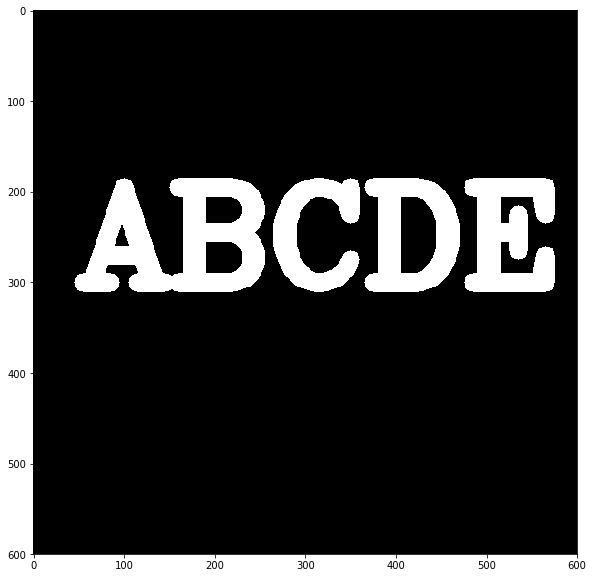

In [14]:
img = load_img()
display_img(img)

In [15]:
kernel = np.ones((5,5),np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

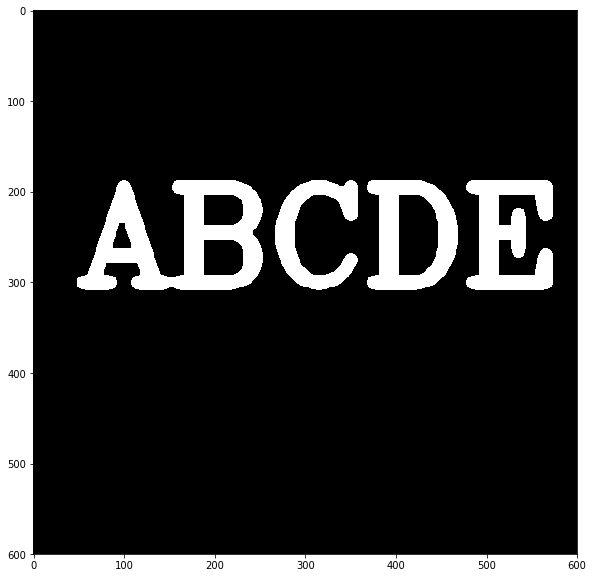

In [18]:
result = cv2.erode(img,kernel,iterations=1) #This command is used to perform the erode operation
display_img(result)

In [19]:
#opening is erosion followed by dilation
img = load_img()

In [21]:
white_noise = np.random.randint(low=0,high=2,size=(600,600)) #The highes value is less that that of high. Therfore, values range from 0-1 only.
white_noise

array([[0, 1, 1, ..., 0, 1, 1],
       [0, 1, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 0, 0]])

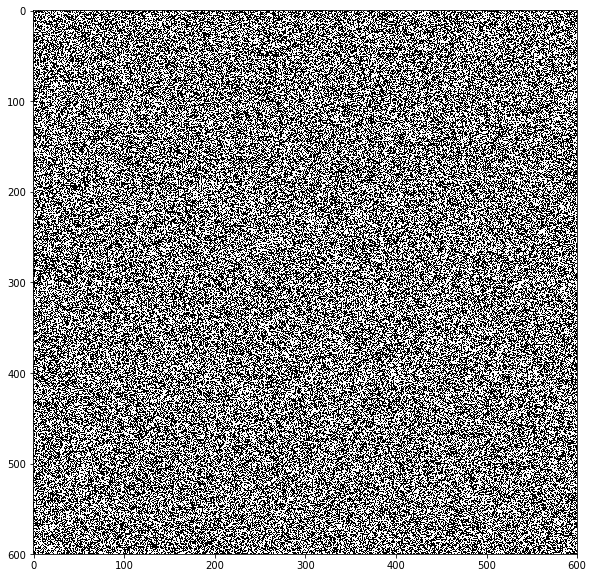

In [22]:
display_img(white_noise)

In [23]:
white_noise = white_noise * 255
white_noise

array([[  0, 255, 255, ...,   0, 255, 255],
       [  0, 255,   0, ..., 255, 255,   0],
       [255,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0, 255, ...,   0, 255,   0],
       [  0,   0,   0, ...,   0, 255, 255],
       [255,   0,   0, ...,   0,   0,   0]])

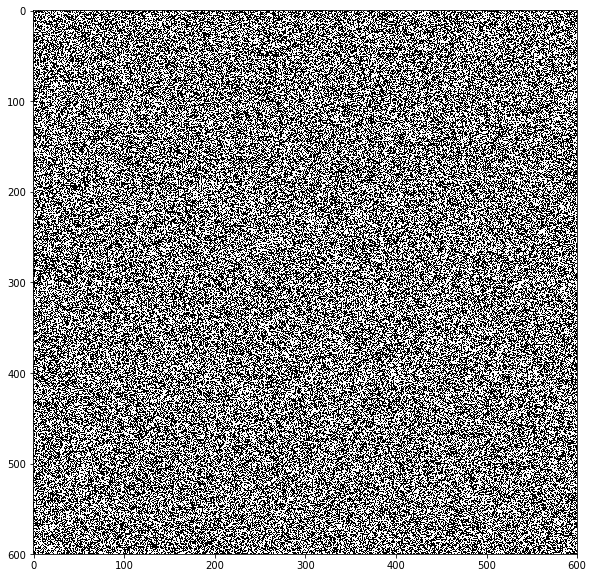

In [24]:
display_img(white_noise)

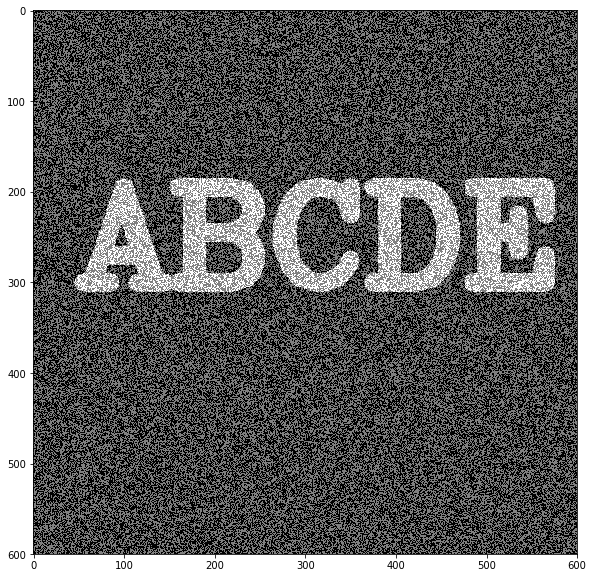

In [25]:
noise_img = white_noise + img #Intentionally create a noisey image
display_img(noise_img)

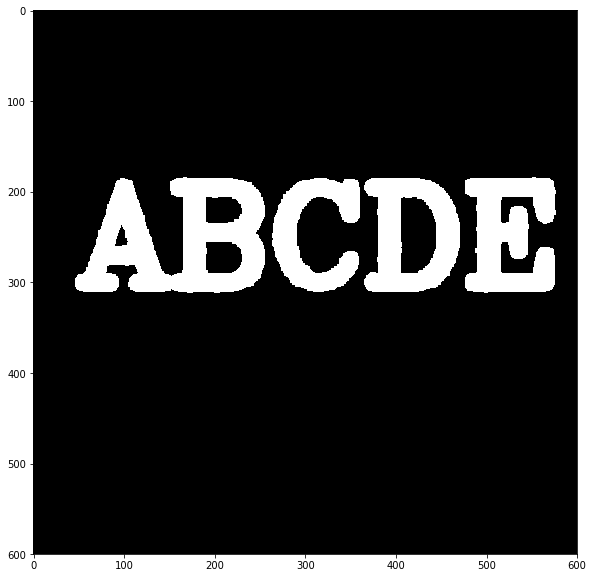

In [27]:
opening = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel) #This command is used to perform morphological opening operation.
#This operation is used generally to eliminate white noise. Which is essentially the background noise in this case
display_img(opening)

In [29]:
img = load_img()
black_noise = np.random.randint(low=0,high=2,size=(600,600))
black_noise

array([[1, 0, 1, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 0, 0, 1],
       ...,
       [0, 1, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 1, 1]])

In [30]:
black_noise = black_noise * -255
black_noise

array([[-255,    0, -255, ..., -255, -255,    0],
       [   0,    0, -255, ..., -255, -255,    0],
       [-255, -255, -255, ...,    0,    0, -255],
       ...,
       [   0, -255, -255, ..., -255,    0,    0],
       [-255,    0,    0, ..., -255, -255,    0],
       [   0,    0, -255, ..., -255, -255, -255]])

In [33]:
black_noise_img = img + black_noise
black_noise_img[black_noise_img == -255] = 0 #Since -255 doesnt make sense. Bring those -255 valued to zero

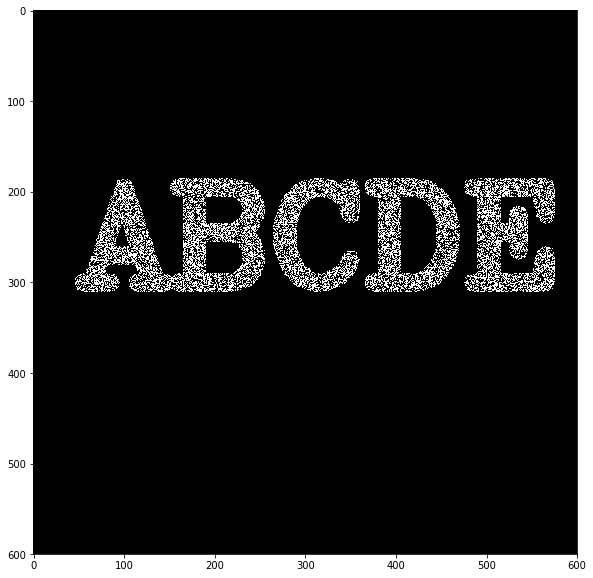

In [34]:
display_img(black_noise_img) #Now we can see that the noise is essentially in the foreground.

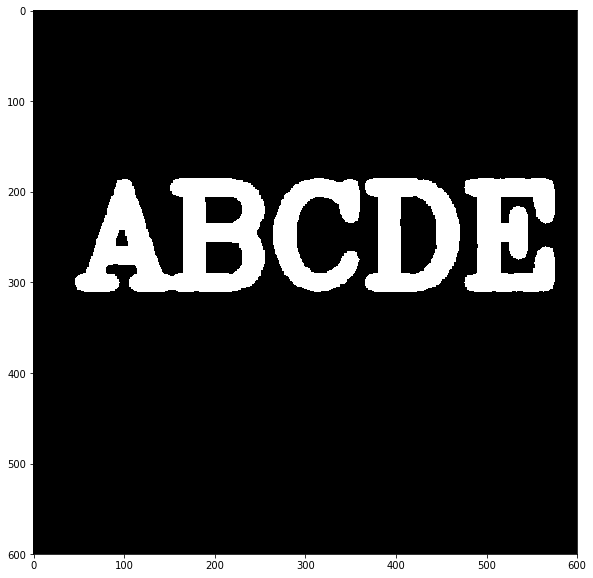

In [35]:
#Closing is  a morphological operation used to eliminate foreground noise
closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel)
display_img(closing)

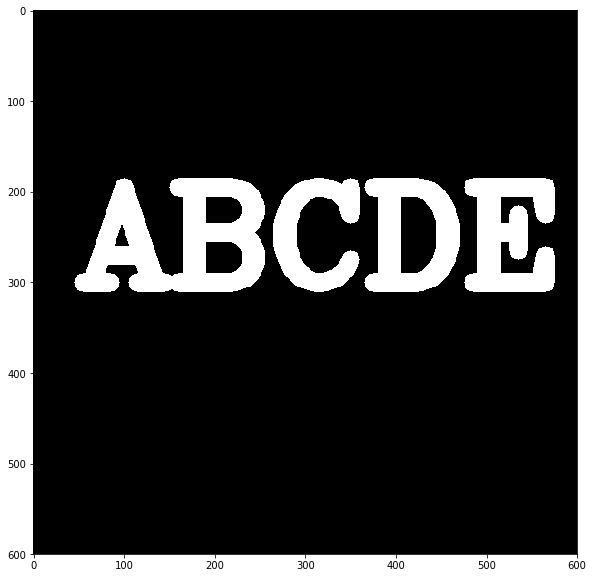

In [36]:
img = load_img()
display_img(img)

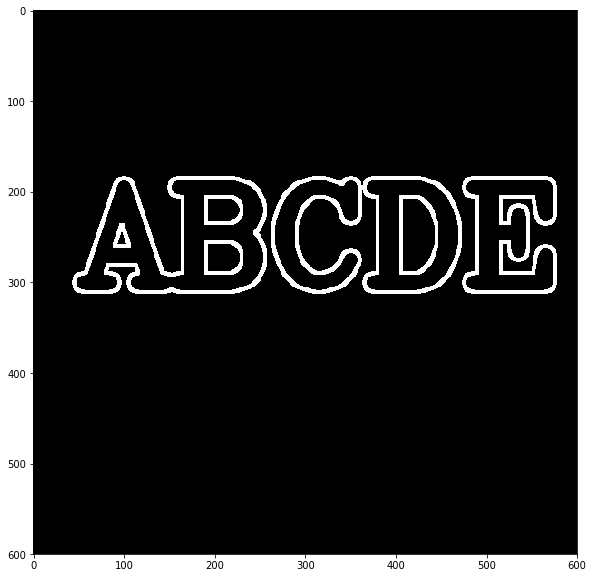

In [39]:
#Morphological gradient takes the difference between dilation and erosion of an image
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
display_img(gradient)